<a href="https://colab.research.google.com/github/RusAl84/IntroML/blob/master/12_%D0%A1%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D1%8B%D0%B9_%D0%BB%D0%B5%D1%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Случайный лес
Дерево решений может оказаться очень большим, со многими уровнями, и его считать придется очень долго. Это не эффективно. Можно ограничить *глубину* дерева (число уровней), но тогда пострадает качество решения задачи. Выход - использовать много меньших деревьев. Пусть одно из них не сможет точно решить задачу, но их совокупность может быть точнее. Если 90 из 100 деревьев сообщают о классе №1, а остальные о классе №2, то можно поверить большинству и в окончательном решении принять класс №1. Получается что не одно дерево, а их множество (совокупность, комитет, объединение и пр. синонимы) будет принимать решение. Тогда отдельное дерево можно сделать по-проще, с меньшей глубиной.

Но правило толпы, что выбор наиболее популярного решения будет более правильный и точный, как и в нашей жизни с голосованиями, работает далеко не всегда. Важно, чтобы голосующие были как можно меньше связаны между собой, чтобы не впадать в общие заблуждения. Так же и для деревьев, надо чтобы деревья в этом комитете были не совсем похожи друг на друга. Этого можно добиться (частично) если деревья создавать на случайно выбранных подмножествах примеров (возможно с повторениями) и случайно выбранных атрибутах.

Множество деревьев это лес :). А множество случайно созданных деревьев это **случайный лес** (random forest по английски). Это очень мощный, популярный и эффективный метод машинного обучения. Часто это первый кандидат для решения поставленной задачи.



В библиотеке `sklearn` случайный лес для классификации реализован в классе [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) входящим в модуль `ensemble` (почему так, а не в модуле `tree` мы узнаем на последующих занятиях).

При создании такого классификатора указываются:
* `n_estimators` - максимальное число деревьев в лесу
* `criterion` - критерий для создания узла: или критерий Джини `gini` (по умолчанию), или энтропия `entropy`.
* `max_depth` - максимальная глубина дерева
* `max_features` - максимальное число атрибутов, которые будут проверены при создании узла, по умолчанию это равно корню квадратному из числа всех атрибутов в данных.  
* `max_samples` - максимальное число примеров используемых для одного дерева (примеры выбираются случайно). 
* и другие менее важные аргументы. 

Создаваемый объект класса `RandomForestClassifier` имеет важные поля:
* `estimators_` - список объектов деревьев (типа `DecisionTreeClassifier`) в этом лесу
* `classes_` - метки классов
* `n_classes_` - число классов
* `n_features_` - число атрибутов
* `n_outputs_` - число выходов
* [`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_) - оценка **важности** атрибутов. Очень полезные сведения, показывающие какой вклад дает тот или иной атрибут в точность решения задачи. Полезно, например, для существенного уменьшения размера дерева: удалив атрибуты с малой важностью не сильно потеряем в точности. Полезно и для интерпретируемости результатов. Вычисляется как суммарная величина уменьшения критерия неопределенности для этого атрибута.

Реализованы методы:
* `apply()` - применение деревьев и расчет индексов листьев 
* `decision_path()` - возвращает конкретный путь принятия решения по лесу 
* `fit()` - обучение леса
* `predict()` - расчет класса для заданного примера
* `score()` - расчет средней точности классификатора для заданных примеров 
* и другие.




  

### Пример случайного леса на синтетических данных
Давайте создадим некоторые данные с двумя классами на плоскости и классифицируем их случайным лесом. Воспользуемся функцией [`make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)  из `sklearn.datasets` для создания данных в виде двух пересекающихся классов с шумом, и функцией `train_test_split` из `sklearn.model_selection` для разделения их на обучающие и тестовые примеры. 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


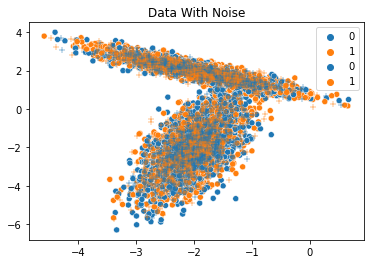

In [ ]:
from sklearn.datasets import make_classification # для генерации данных
from sklearn.model_selection import train_test_split # для разделения на обучение и тест
from sklearn.ensemble import RandomForestClassifier # случайный лес

import numpy as np
import seaborn as sns # для простого отображения
import matplotlib.pyplot as plt #

# создаем данные
X,y = make_classification(n_samples=10000, # число примеров
                          n_features=2, # число признаков (атрибутов)
                          n_informative=2, # из них информативных
                          n_redundant=0, # из них не информативных
                          n_repeated=0, # из них повторяющихся
                          n_classes=2, # число классов
                          n_clusters_per_class=1, # число кластеров на класс
                          class_sep=2, # влияет на расстояние между кластерами
                          flip_y=0.9, # 0.2 доля ошибок (шума)
                          weights=[0.5,0.5], # пропорции числа данных в классах
                          random_state=17) # 

# разделяем на обучающие и тестовые, случайно
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
# рисуем данные
plt.subplots();#
ax1=plt.gca();#
sns.scatterplot(X_train[:,0],X_train[:,1],hue=y_train,ax=ax1);# обучающие
sns.scatterplot(X_test[:,0],X_test[:,1],hue=y_test,ax=ax1,marker="+");# тестовые

ax1.set_title("Data With Noise");#
plt.show();#

0.5196969696969697


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


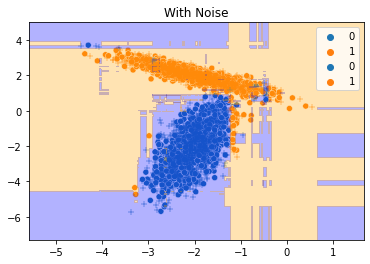

In [ ]:
# Создаем классификатор на основе случайного леса. Изменяйте параметры и смотрите как это влияет на обучение
clf = RandomForestClassifier(max_depth=5,# 5 максимальная глубина дерева
                             n_estimators=20,# 10 число деревьев в лесу
                             max_features=1)# максимальное число признаков для каждого дерева

clf.fit(X_train, y_train) # обучаем 

y_pred = clf.predict(X_test) # проверяем на тестовых данных

score=clf.score(X_test, y_test) # считаем среднюю точность
print(score)

ind=y_test==y_pred; # индексы совпадений результата классификации и меток классов

plt.subplots(); 
ax2=plt.gca();
# рисуем "правильно" распознанные примеры
sns.scatterplot(X_test[ind,0],X_test[ind,1],hue=y_test[ind],ax=ax2);
# рисуем "неправильно" распознанные примеры
sns.scatterplot(X_test[~ind,0],X_test[~ind,1],hue=y_pred[~ind],ax=ax2,marker="+");
#sns.scatterplot(X_test[:,0],X_test[:,1],hue=y_test[:],ax=ax2,marker="+");

ax2.set_title("With Noise");

# считаем и рисуем разделяющую поверхность.
plot_step=0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # немного измененные минимальное и максимальые значения превого атрибута 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # немного измененные минимальное и максимальые значения второго атрибута 
# считаем прямоугольную сетку возможных значений этих атрибутов
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), #
                     np.arange(y_min, y_max, plot_step)) #
  
# считаем выход классификатора для всех примеров сетки
# не забыв что массивы данных нужно привести к требуемому размеру.
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape) # и преобразуем обратно в исходному размеру

# рисуем разделяющую поверхность
cs = plt.contourf(xx, yy, Z, levels=1, colors=['blue','orange'],alpha=0.3) # рисуем контурную карту
plt.show();

In [ ]:
#clf.estimators_[0].n_features_in_


2

Выше не зря слова "правильно" и "неправильно" классифицированные взяты в кавычки. С точки зрения самого метода, крестиками обозначены неправильно классифицированные примеры, у которых метка результата не совпадает с исходной меткой класса в данных. Но как вы можете увидеть своими глазами, именно эти примеры данных были "шумом", т.е. специально сделанными неправильными примерами. И случайный лес справился, отсеял шум, распознав их верно с точки зрения нас как создателей данных.

Это важно осознать, когда мы считаем точность или другие метрики для классификаторов, то можем их посчитать только на тестовых данных. **Но никто не гарантирует что эти тестовые данные сами по себе не ошибочны!** 

Так что может быть такая ситуация, что точность маленькая, а классификатор работает отлично, игнорируя ошибки в самих данных. 

Попробуйте изменять максимальную глубину и число деревьев, посмотрите, как это влияет на разделяющую поверхность и точность.

Каждое дерево в лесу можно нарисовать, давайте посмотрим на одно из них.


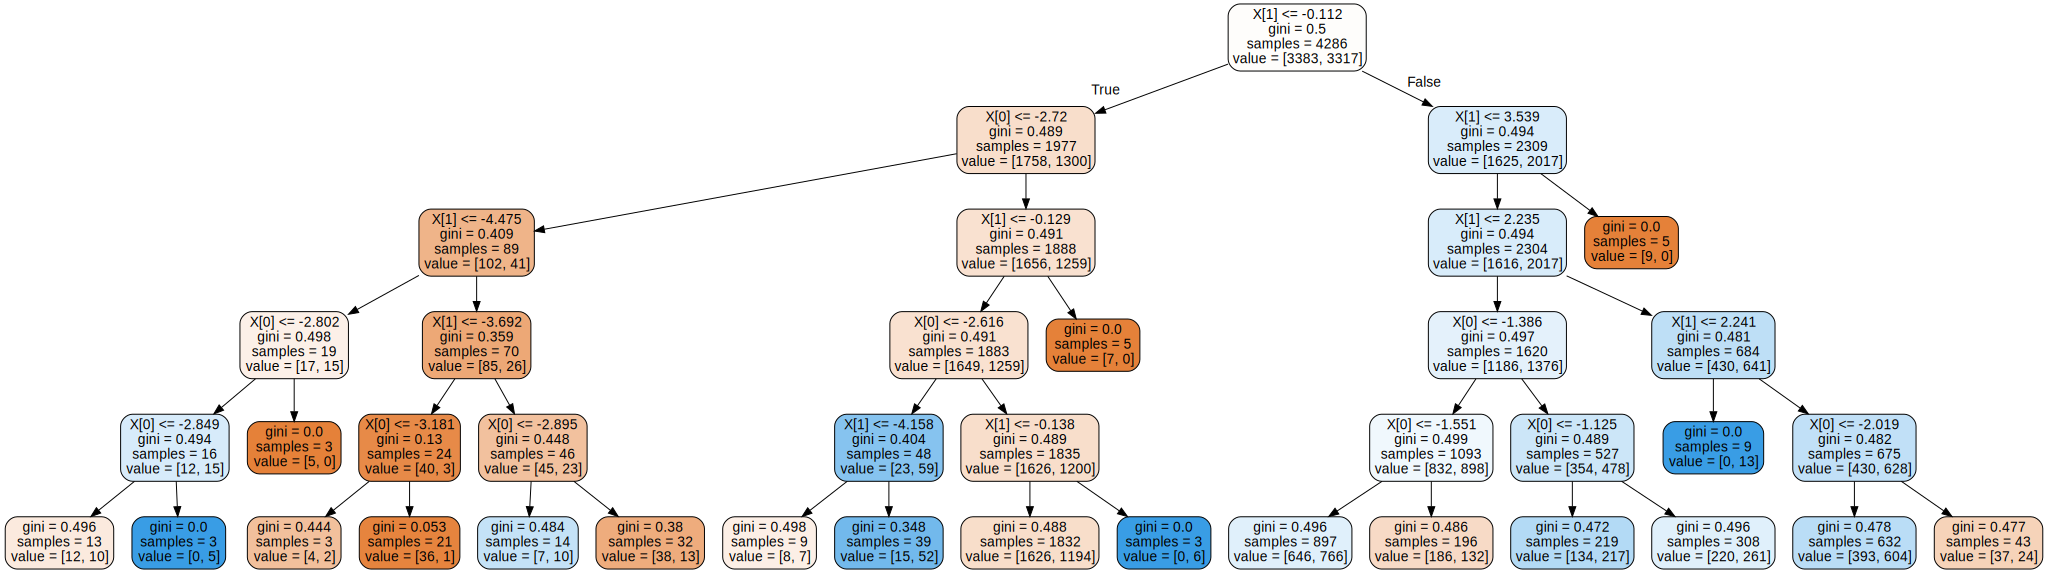

In [ ]:
tree_data=clf.estimators_[2] # третье дерево

# рисуем его
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(tree_data, out_file=None,  # можем указать дополнительные опции конвертации
                     filled=True, rounded=True)  # прочие детали отображения
graph = graphviz.Source(dot_data)  # # загружаем дерево из переменной или файла в представление graphviz
graph  # отображаем на экране


## Пример на другом наборе данных
Разумеется все тоже самое работает и на других наборах данных, многомерных.

Оценить качество классификации можно с помощью разных метрик, например аккуратность (accuracy) или F1-мера, и др. Вспомните, что они обозначают и как считаются. В `sklearn` такие метрики находятся в модуле  `metrics` под названиями `accuracy_score`, `precision_score`, `recall_score`, `f1_score`.

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']
Accuracy= 0.9629629629629629
F1= 0.9652777777777778
Precision= 0.9652777777777778
Recall= 0.9652777777777778


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


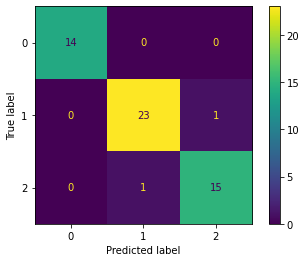

In [ ]:
from sklearn.datasets import load_wine
# загружаем данные
data_wine = load_wine()

# атрибуты
print("Features: ", data_wine.feature_names)

# метки классов
print("Labels: ", data_wine.target_names)
# 
X = data_wine.data
y = data_wine.target
# разделяем на обучающие и тестовые 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# создаем классификатор
clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2)
# обучаем его
clf.fit(X_train, y_train)
# проверяем на тестовых данных
pred = clf.predict(X_test)
# считаем метрики
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average="macro")
precision = precision_score(y_test, pred, average="macro")
recall=recall_score(y_test, pred, average="macro")
print('Accuracy=',accuracy)
print('F1=',f1)
print('Precision=',precision)
print('Recall=',recall)
plot_confusion_matrix(clf,X_test, y_test)

Визуализация модели

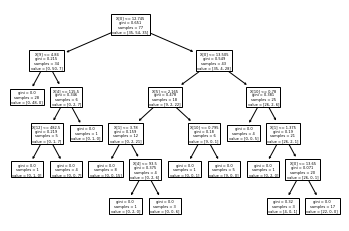

In [ ]:
# выбираем дерево из леса
estimator = clf.estimators_[5]
# рисуем его
import graphviz
from sklearn import tree
tree.plot_tree(estimator) ;


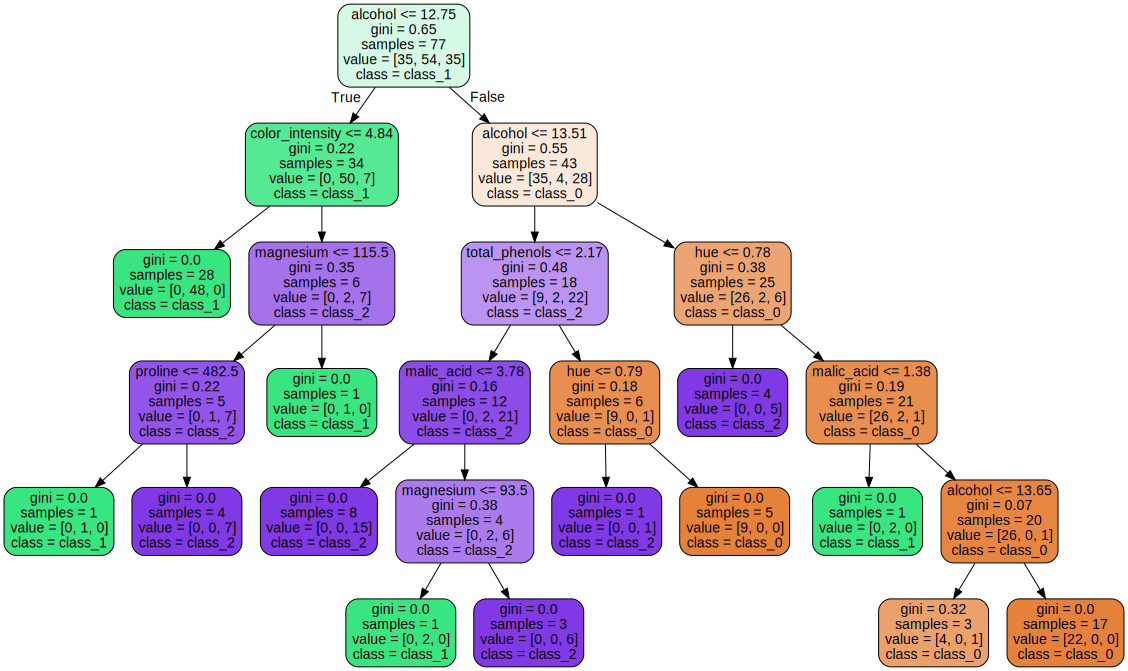

In [ ]:

tree_data=tree.export_graphviz(estimator, out_file=None, 
                feature_names = data_wine.feature_names,
                class_names = data_wine.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True);

graph=graphviz.Source(tree_data,format='png');
graph


# Задание и обсуждение
Пробуйте изменять параметры случайного леса и смотрите как это влияет на качество решения задачи.
Попробуйте на своих данных.